# Research Notebook
## Rodrigo Terezon
## Date: Jan 25

# 1: Experience
## Describe at least one research activity you worked on this week. 

- Downloaded ubuntu (since I am on windows) and visual studio code so that I can beging coding
- Used uv to download all dependencies (especially PTArcade)
- Began plotting (stochastic) bayesian posterior plots for various spectra and parameters

## Motivation:

PTArcade is essential going forward with the research process, and so, I must ensure that I have the proper files and packages downloaded. This allows me to begin plotting the bayesian posteriors and to start interpreting the plots generated. It is also important to understand how we can adapt our existing code to allow for more complex spectrum.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Originally, when trying to run the "uv" package management system I ran into multiple errors. After trying to figure out why this was happening, I realized that it was because I was on a windows system. To fix this, I downloaded ubuntu. (Ubuntu is a free open source linux operating system.) Afterwards, I was able to finally use uv.

Our code makes use of PTArcade, which is a package that allows for pulsar timing array data analysis [1]. The goal was to get acquainted with the softwared as it will be used for the rest of the project. This was done by using various parameters for our components. In addition, two spectrums were coded so that I can observe and understand how we can apply a basic stochastic model and upgrade it to account for more parameters, or further complex functions.

Using PTArcade (NG15 Data), the following two spectrums were plotted:

1. Stochastic signal with broken power law spectrum [1]

    ```
    parameters = {'log_A_star' : prior("Uniform", -14, -6),
    'log_f_star' : prior("Uniform", -10, -6)}
    
    def S(x):
        return 1 / (1/x + x)

    def spectrum(f, log_A_star, log_f_star): 
        A_star = 10**log_A_star
        f_star = 10**log_f_star
        return A_star * S(f/f_star)
    ```

    With our function:

    $ h^{2}\Omega_{GW}(f)=A_{*}\frac{f/f_{*}}{1+f^{2}/f_{*}^{2}} $


2. Stochastic signal from bubble wall contributions


    ```
    parameters = {
                'log_omega' : prior("Uniform", -14, -6),
                'log_beta_h' : prior("Uniform", 1, 3),
                'log_k_phi' : prior("Uniform", -3, 0),
                'log_alpha' : prior("Uniform", -3, 1),
                }

    def S(x):

        return 3.8 * (x**2.8) / (1.0 + 2.8 * (x**3.8))

    def spectrum(f, log_omega, log_beta_h, log_k_phi, log_alpha):

        omega = 10**log_omega
        beta_h = 10**log_beta_h
        k_phi = 10**log_k_phi
        alpha = 10**log_alpha

        p1 = ((k_phi*alpha)/(alpha+1))**2
        f_pbw = 0.23*beta_h

        return omega * p1 * (beta_h**(-2)) * S(f/f_pbw)
    ```

    With the function:

    $ h^{2}\Omega_{GW}(f)=\mathcal{R}h^{2}\widetilde{\Omega}_{bw}(\frac{\kappa_{\phi}\alpha}{\alpha+1})^{2}(\frac{\beta}{H})^{-2}s_{bw}(f/f_{p,bw}) $ [2]

    With:
    $ s_{bw}(x)=\frac{3.8x^{2.8}}{1+2.8x^{3.8}}\text{ and }f^{em}_{p,bw}/\beta=0.23 $ [2]


# 3: So what? (What does it mean?)
## Describe your results

Plotting the stochastic signal with broken power spectrum resulted in:

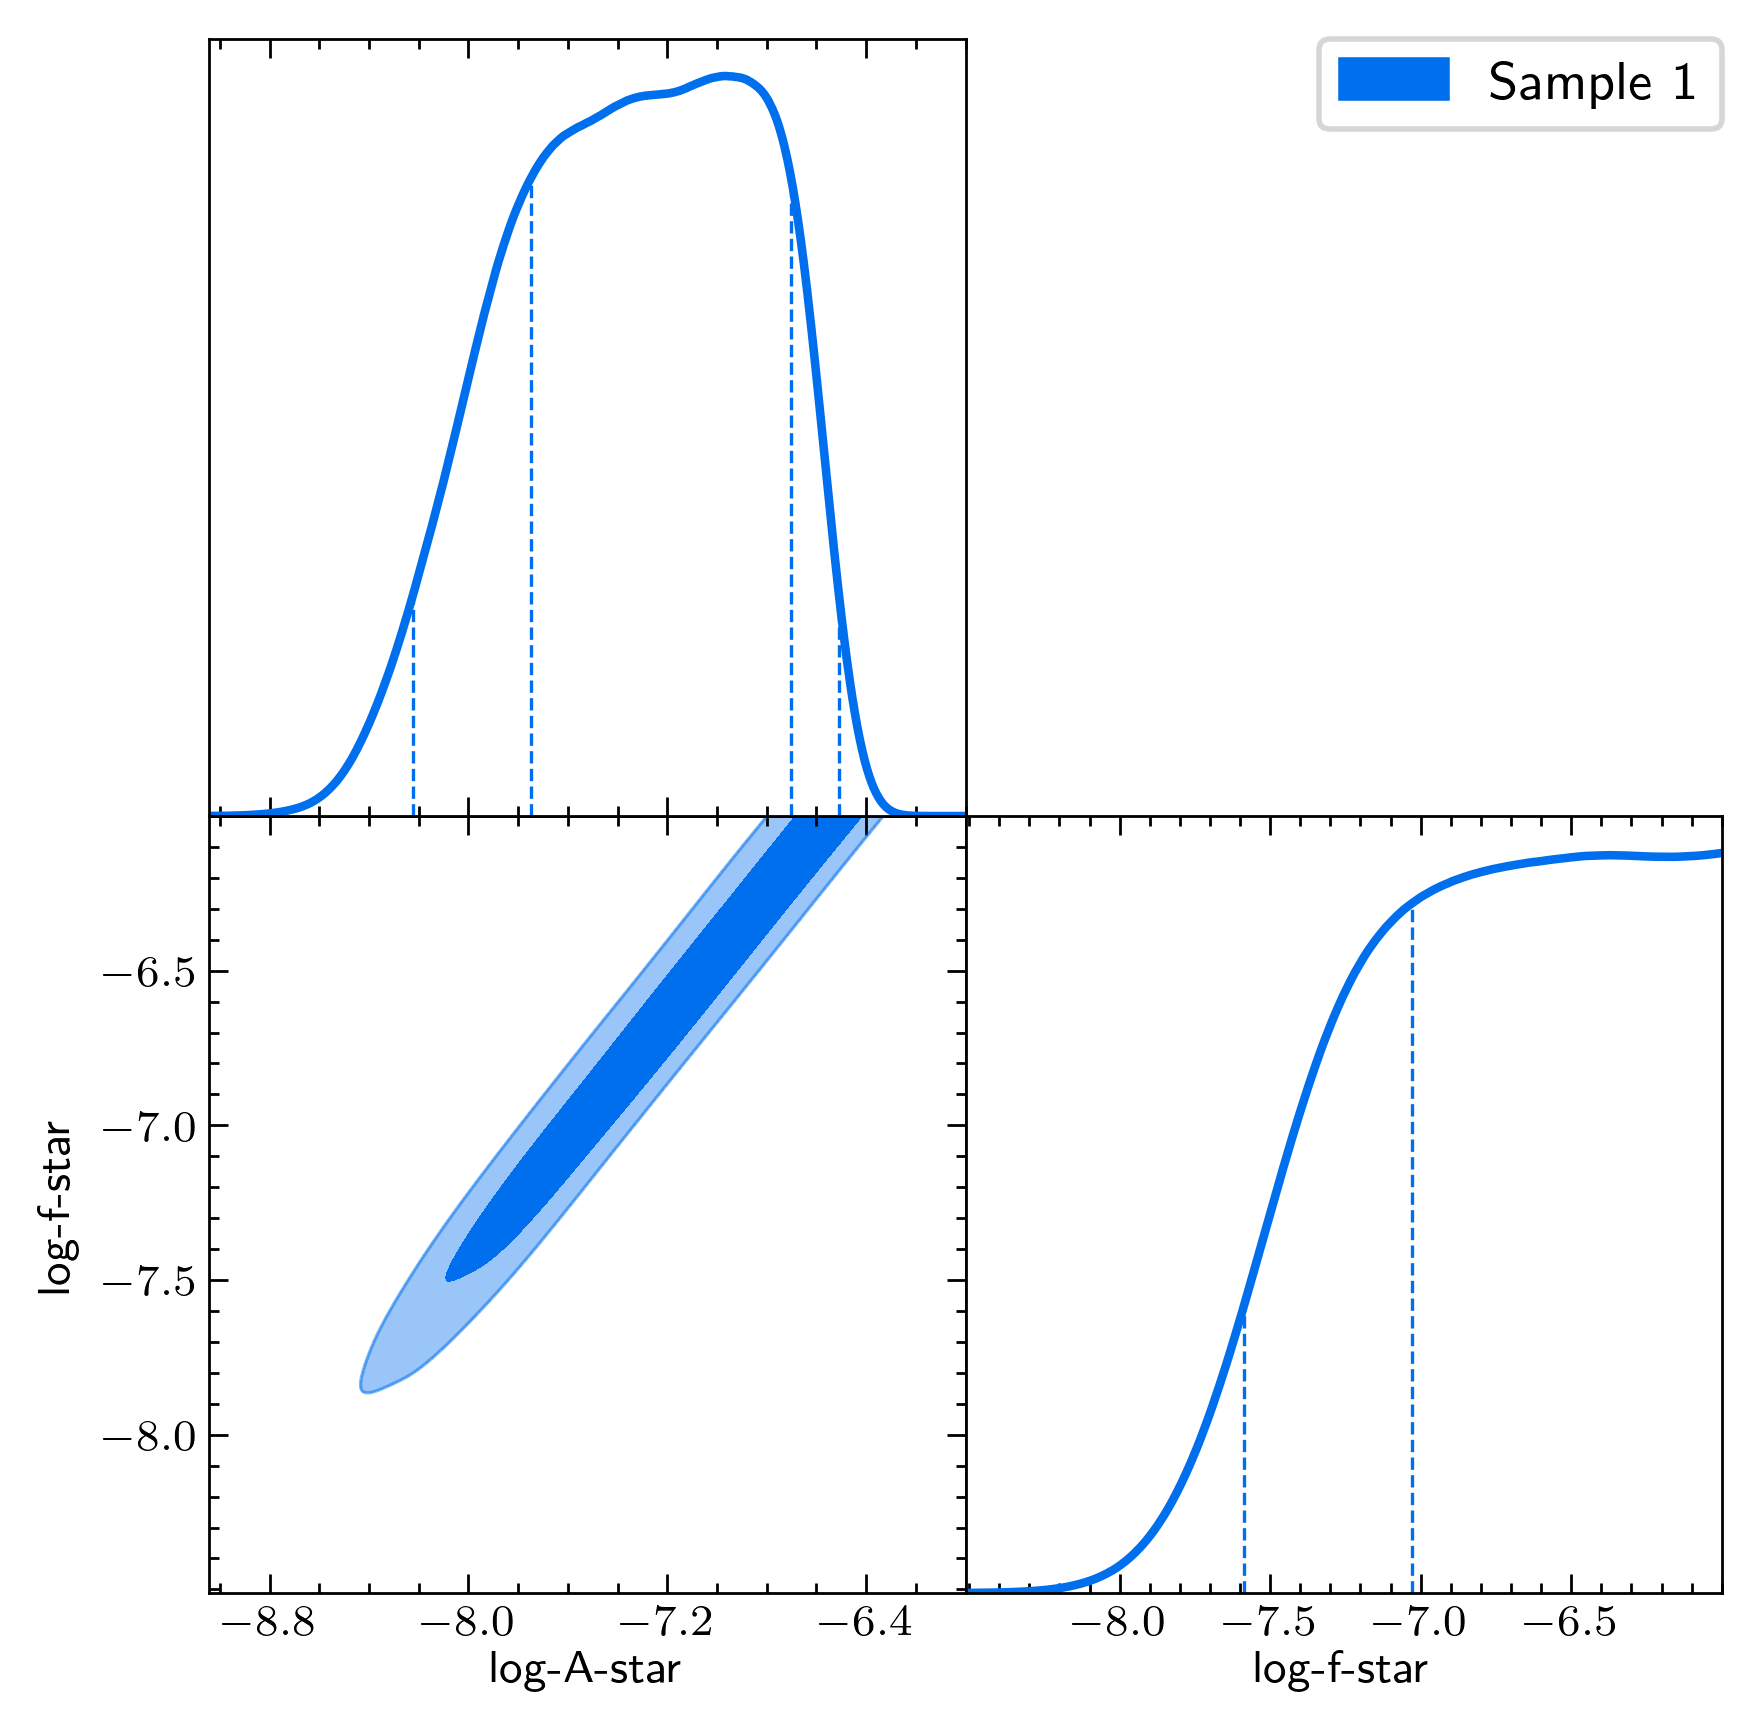

Plotting the tochastic signal from bubble wall contributions resulted in:

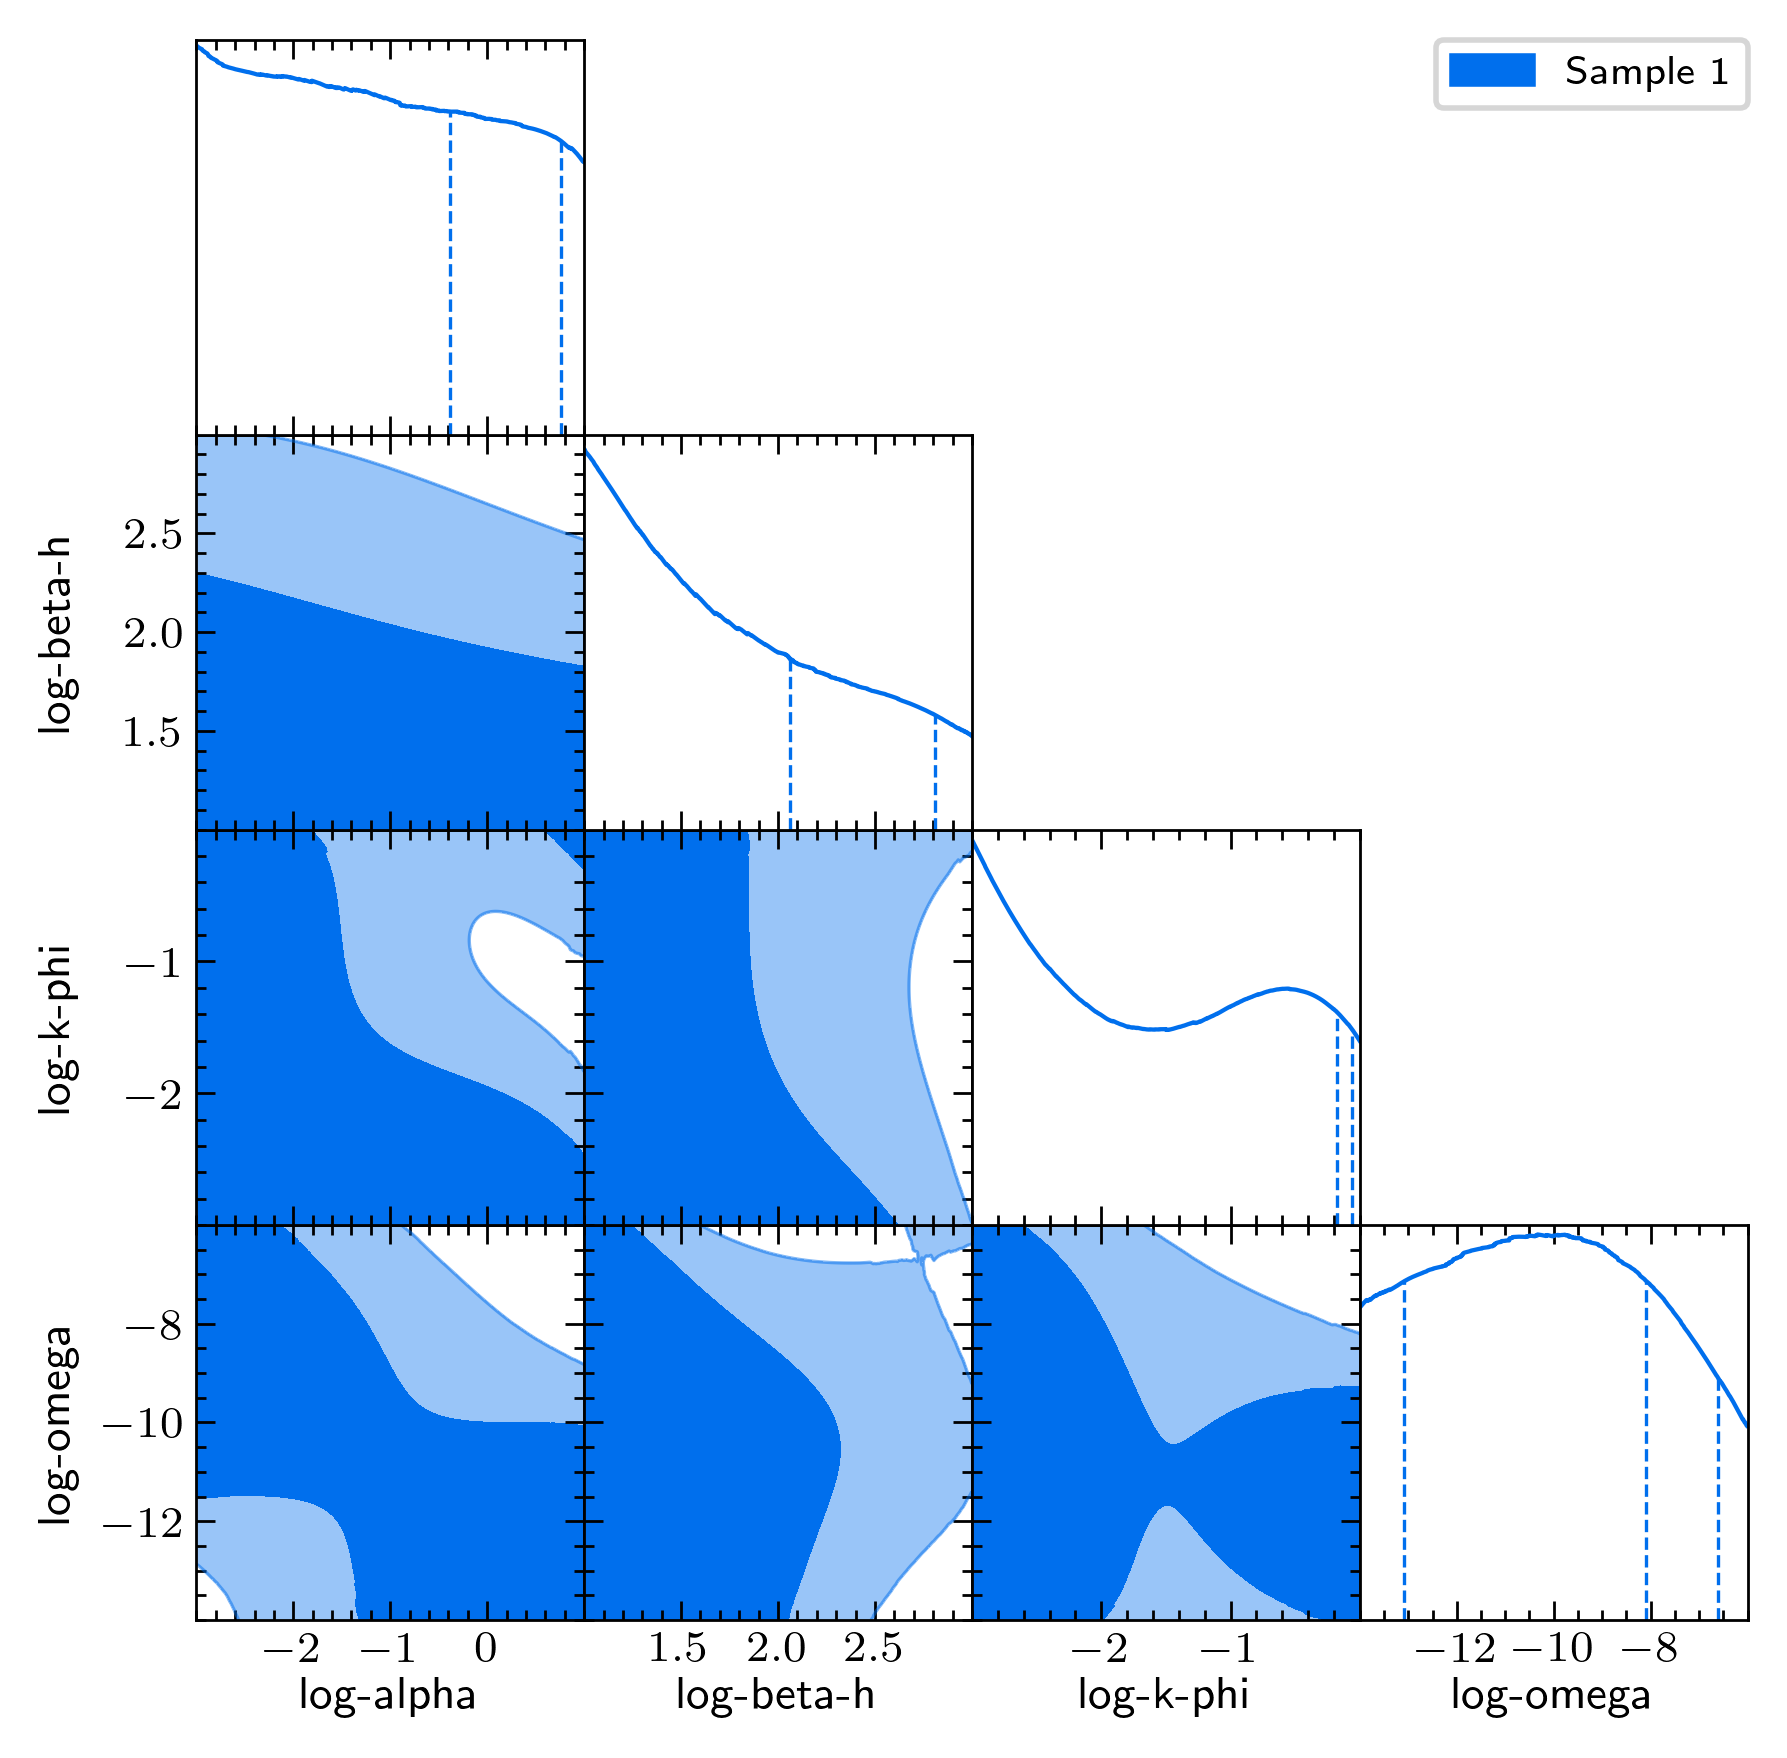

The plots were more easily obtained using the PTArcade plot utils [3]:

    from ptarcade import chains_utils as c_utils
    from ptarcade import plot_utils as p_utils

    params, chain = c_utils.import_chains('Rodrigo/chains_bubble2/np_model/')

    fig, ax = p_utils.plot_posteriors([chain], [params])

    fig.savefig("Rodrigo/graphs/graph_test_bubble2.png", dpi=400, bbox_inches="tight")

These plots were created using the NanoGrav 15 year data.

Gravitational waves can come from sources such as sound wave or bubble wall collison contributions. Bubble wall collisions came from first order phase transitions. In the early universe, these bubbles formed from varying fields, where the bubbles would contain lower energy pockets. Collisions with the bubbles would create a stochastic gravitational background.

In our function, $ \alpha $ can be thought of as term to indicate the strength of the gravitational wave, greater $ \alpha $ means greater signal. $ \kappa_{\phi} $ would indicate the energy of the bubble. $ \frac{\beta}{H} $ is a measure of how fast a transition is. $ s_{bw}(f/f_{p,bw}) $ indicates how energy from a graviational wave is distributed over a range of frequencies. Therefore, $ f_{p,bw} $ indicates is the frequency where energy of bubble wall collision is at its peak.

The 1D posterior plots tell us is the probability that, ignoring the other parameters, what are the most likely values I would expect for the specific parameter/plot I am looking at. The 2D posterior plots tell that if we compare two parameters, and one parameter is changing, how should the other change to compensate so that our samples (MCMC) still fit the NG15 data. Darker regions correspond to more likely values.

For example, we can see that the shape for the 2D posterior plot correlating the $ \alpha $ and $ \frac{\beta}{H} $ does not seem to be a random distribution, but rather have a solid line. This makes sense, because as mentioned above, the strength of a gravitational wave and speed of a transition have a direct correlation.

The results are a success in the sense that I have begun to plot the posteriors, and can see correlations in some of the parameters. However, the parameters were chosen essentially at random, an thus do not carry much weight. I will continue to play with different parameters and hopefully formulate ones that have physical meaning.

# 4. Now what? (What's next?)
## Plan for the next week

I was successful at plotting the stochastic bayesian posteriors. The next steps (which may taken longer than a week) are as follows:

- Read over the thesis to better understand the material and what the plots represent more precisely
- Continue using various parameters to see how it can impact the plots
- Begin plotting deterministic bayesian posterior plots
- Fix bubble wall spectrum code and work on sound wave contribution spectrum
- Plot the spectrum as a function of frequency, determine the primary contribution affecting the NG-15 data (bubble walls or sound waves)
- Use other data sources (NanoGrav 12.5-year or IPTA DR2)

The most important part is to go over the thesis so I can more accurately describe what I am plotting.

# 5. Bibliography

[1] Mitridate, A., & PTArcade contributors. (n.d.). *PTArcade: A Python toolkit for PTA gravitational-wave inference*. Retrieved Jan 25, 2026, from https://andrea-mitridate.github.io/PTArcade/
<br>
[2] Tasillo, C. (2023). *Exploring the Dark Universe with
Gravitational Wave Backgrounds*. Universität Hamburg. Retrieved from https://ediss.sub.uni-hamburg.de/bitstream/ediss/11329/1/PhD_thesis_Carlo_Tasillo_Bibversion.pdf
<br>
[3] Mitridate, A., Wright, D., & PTArcade contributors. (2023). *PTArcade*. arXiv. https://arxiv.org/abs/2306.16377